In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and Prepare Data
df = pd.read_csv("cleaned_consumption_dataset.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Convert hourly data to daily totals for Prophet
df_daily = (
    df.groupby(['Consumer', df['Timestamp'].dt.date])['Consumption']
      .sum().reset_index()
      .rename(columns={'Timestamp': 'ds', 'Consumption': 'y'})
)
df_daily['ds'] = pd.to_datetime(df_daily['ds'])


11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] done processing



Training Prophet model for Consumer 1...


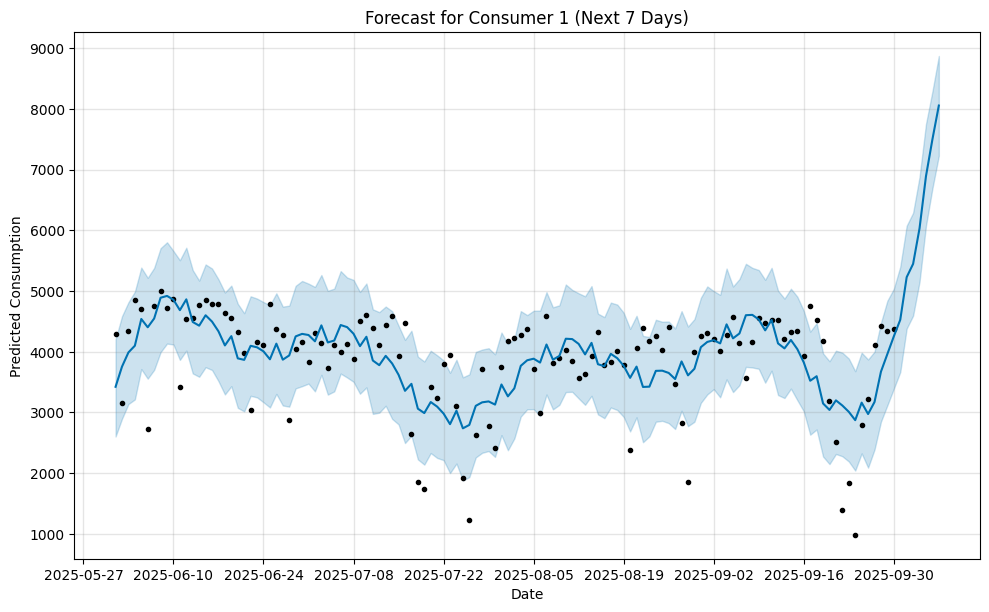

11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] done processing



Training Prophet model for Consumer 2...


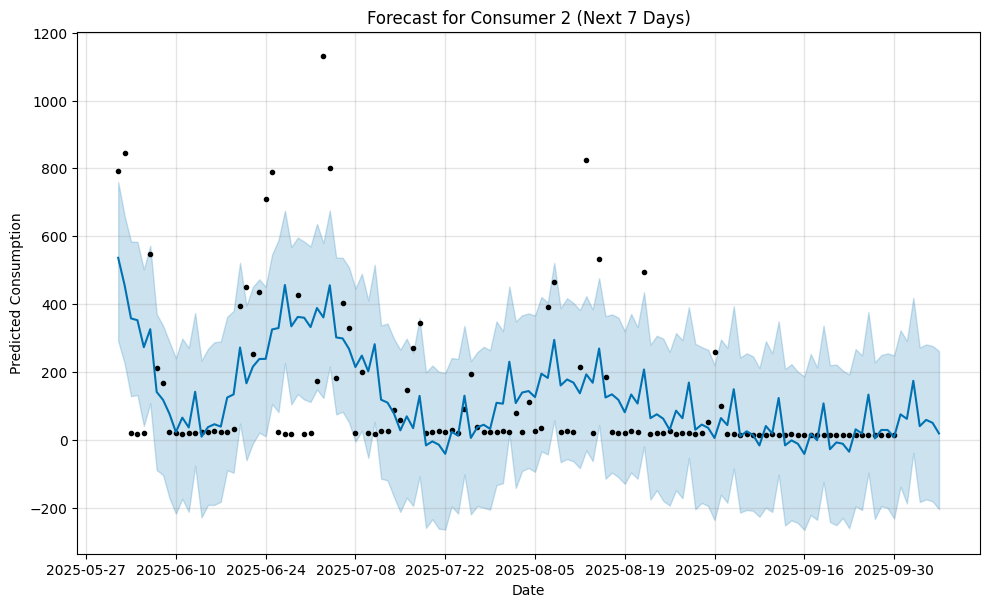

11:53:25 - cmdstanpy - INFO - Chain [1] start processing
11:53:25 - cmdstanpy - INFO - Chain [1] done processing



Training Prophet model for Consumer 3...


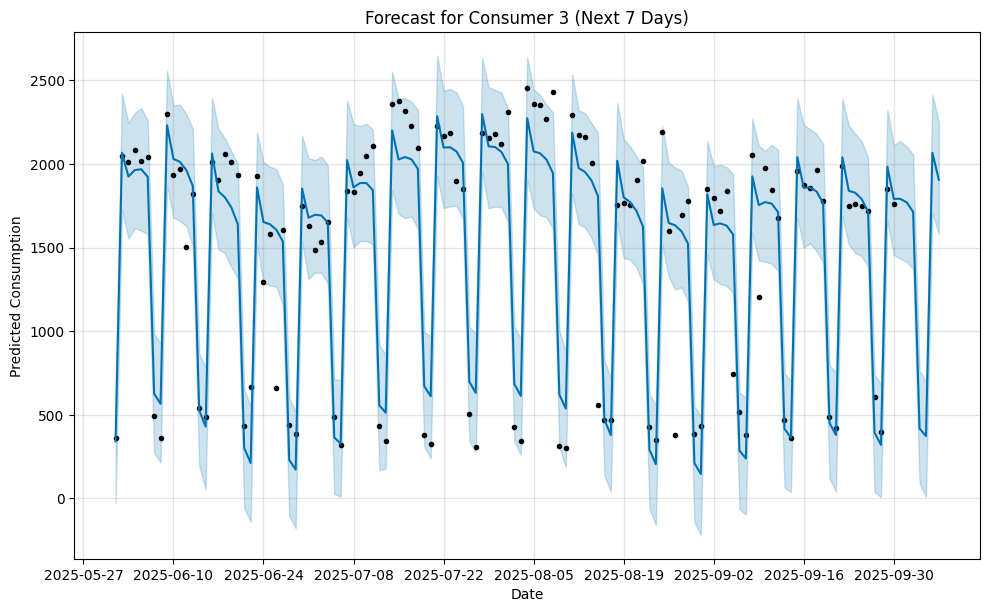

11:53:26 - cmdstanpy - INFO - Chain [1] start processing
11:53:26 - cmdstanpy - INFO - Chain [1] done processing



Training Prophet model for Consumer 4...


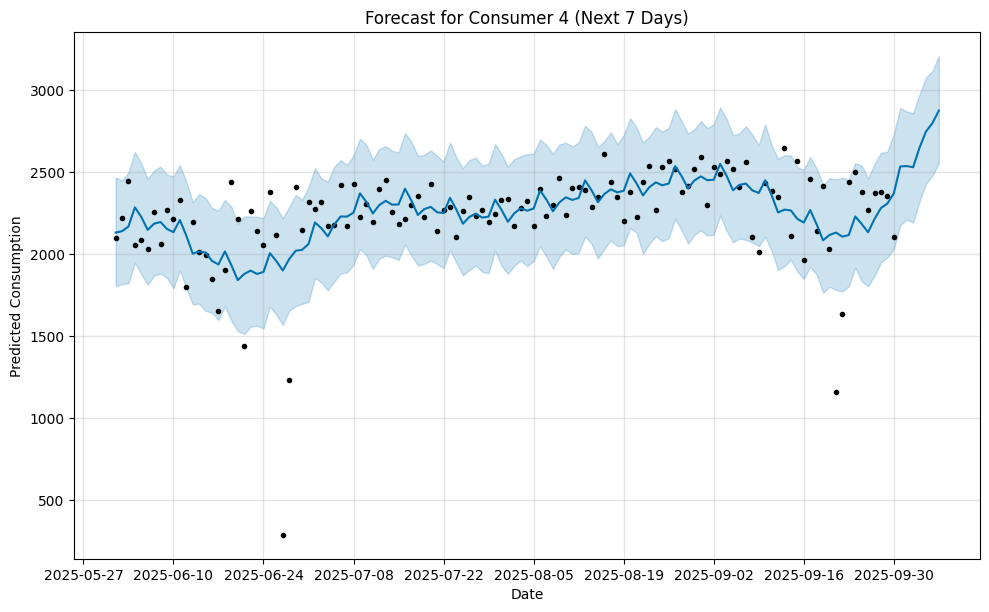

11:53:26 - cmdstanpy - INFO - Chain [1] start processing
11:53:26 - cmdstanpy - INFO - Chain [1] done processing



Training Prophet model for Consumer 5...


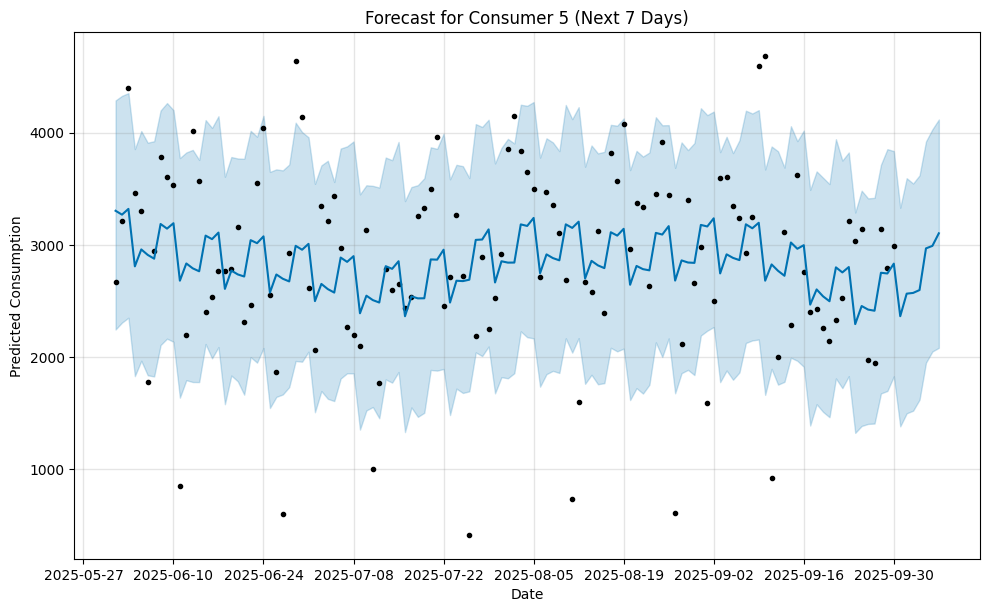

In [ ]:
# Forecast for each consumer
forecast_results = []

for consumer in df_daily['Consumer'].unique():
    print(f"\nTraining Prophet model for {consumer}...")
    data = df_daily[df_daily['Consumer'] == consumer][['ds', 'y']].copy()
    model = Prophet(daily_seasonality=False, yearly_seasonality=True)
    model.fit(data)
    
    # Forecast for next 7 days
    future = model.make_future_dataframe(periods=7, freq='D')
    forecast = model.predict(future)
    
    # Store consumer info
    forecast['Consumer'] = consumer
    forecast_results.append(forecast)
    
    # --- THIS IS THE PLOTTING FIX ---
    # Save the plot instead of showing it
    fig = model.plot(forecast)
    plt.title(f"Forecast for {consumer} (Next 7 Days)")
    plt.xlabel("Date")
    plt.ylabel("Predicted Consumption")
    plt.show()
    

In [ ]:
# Combine all forecasts
final_forecast = pd.concat(forecast_results, ignore_index=True)

# Save forecast results
final_forecast.to_csv("forecast_next_7_days.csv", index=False)
print("\nForecast complete! Saved to 'forecast_next_7_days.csv'")


Forecast complete! Saved to 'forecast_next_7_days.csv'
